In [36]:
# japanize_matplotlibインポート( plotの文字化けを解消するため )
import japanize_matplotlib

# pandasをインポートし、別名 pd とする
import pandas as pd

# treeモジュールのインポート
from sklearn import tree

# train_test_splitメソッドのインポート
from sklearn.model_selection import train_test_split

# numpy をインポート
import numpy as np

# グラフ描画を当タブに表示
# 実装
%matplotlib inline

# データを先頭５行表示

In [37]:
# csvファイルを読み込み
df = pd.read_csv('diabetes.csv', encoding='cp932')
df.head(5)

,id,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# 欠損値を確認
### 読み込んだデータから欠損値がないかを調べてみましょう！

In [38]:
# 欠損値がないことを確認
df.isnull().sum()

id        0
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

## ↑ 欠損値はないため、ダミー変数、平均値、列削除などは不要と判断

# 特徴量データを取得

## id と target を 外して それ以外を特徴量データとして取得

In [39]:
# 特徴量データ様にid , 進行状況をドロップ
# 画像データを特徴量データとして設定
df_Feature = df.drop([ "id", "target" ], axis=1)

# 先頭5行を表示
df_Feature.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [40]:
# 正解データ(target)を取得
df_Answer = df['target']

# 正解データ(target)の先頭５行を表示
# 実装
df_Answer.head(5)

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

# target と それ以外の相関関係を描画して確認した
# 結果 : 明確な相関性が見えなかった

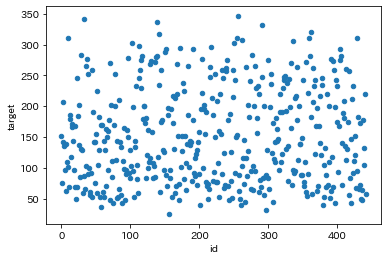

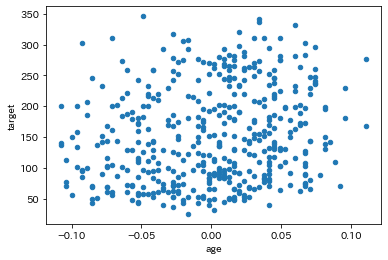

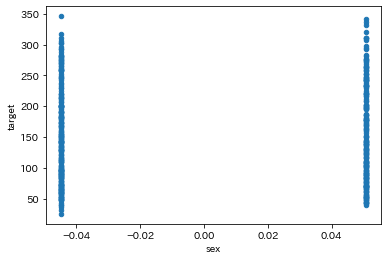

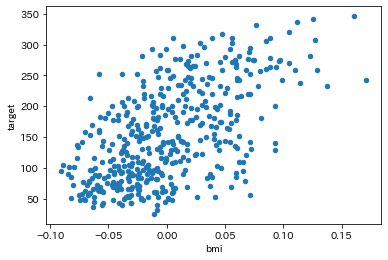

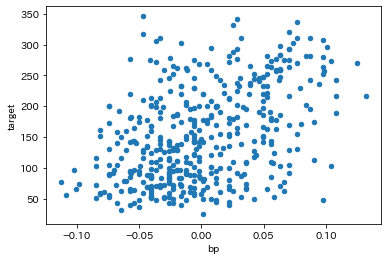

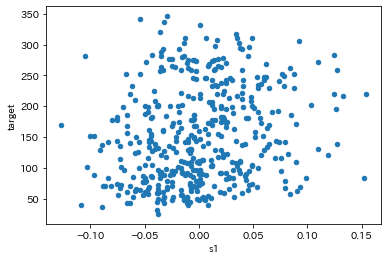

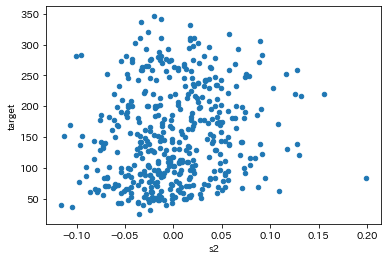

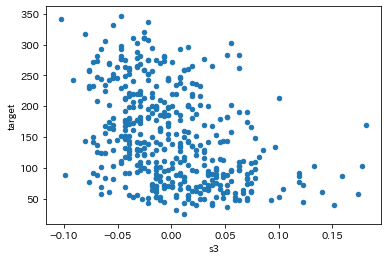

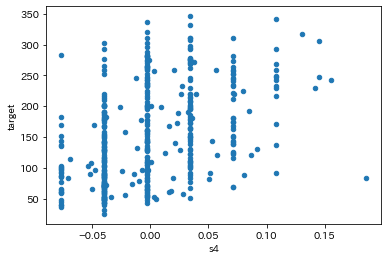

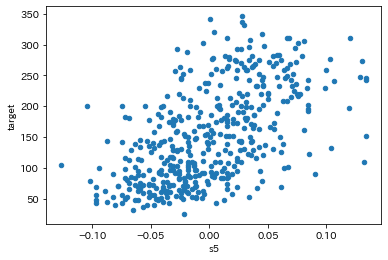

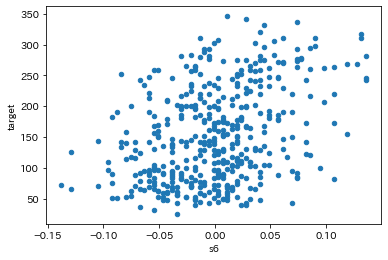

In [41]:
# 各特徴量の列と家賃列の相関関係を示す散布図を描く
# 　目的： 各列のどの範囲が外れ値となるかを図から確認するため
colname = df.columns
for name in colname:
    if name != 'target':    # target は描画
        df.plot(kind = 'scatter' , x = name , y = 'target')

# 特徴量データの組み合わせから散布図を描画 - 相関性を確認

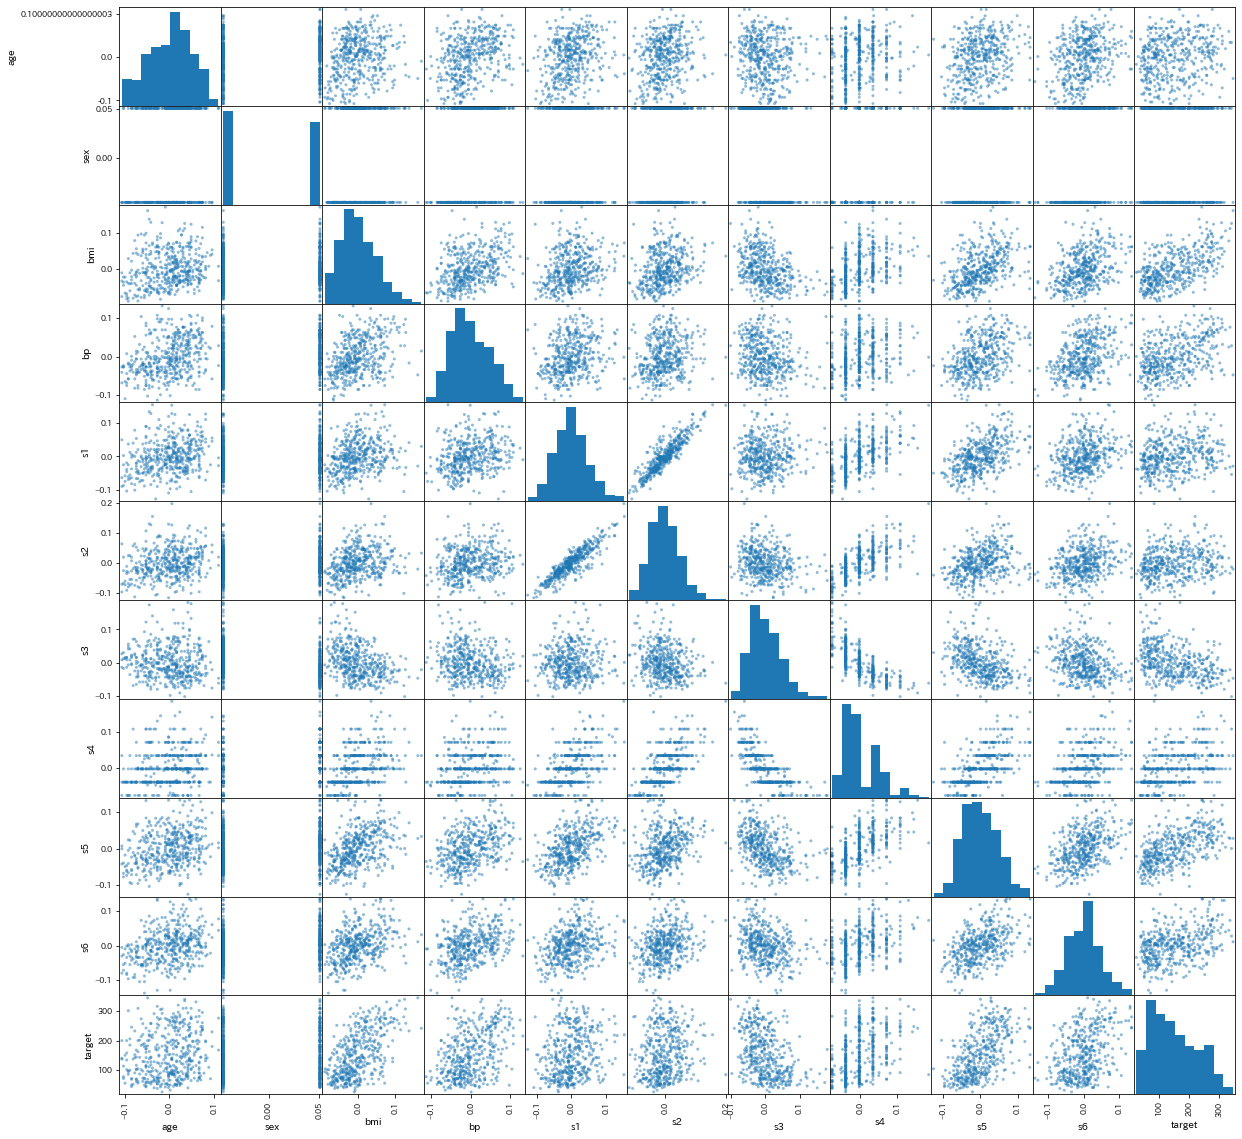

In [42]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(pd.concat([df_Feature, df_Answer], axis=1), figsize=(20, 20))
plt.show()

# 上記から相関係数が強い箇所については、[ S1 と S2 ] であることが分かる
## 下記はピックアップして表示

<AxesSubplot:xlabel='s1', ylabel='s2'>

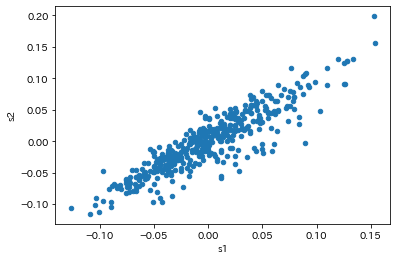

In [43]:
df.plot(kind = 'scatter' , x = 's1' , y = 's2')

# 上記の図から外れ値を削除

In [44]:
# 外れ値のインデックスを確認
print(df_Feature[(df_Feature['s1'] > 0.13) & (df_Feature['s2'] > 0.13)].index)


Int64Index([123, 161, 230], dtype='int64')


In [45]:
# 外れ値を削除
li_index_drop = [123, 161, 230]
df_Feature_drop = df_Feature.drop(li_index_drop, axis = 0)
df_Answer_drop = df_Answer.drop(li_index_drop, axis = 0)


## 外れ値の除外前後を描画にて確認

<AxesSubplot:xlabel='s1', ylabel='s2'>

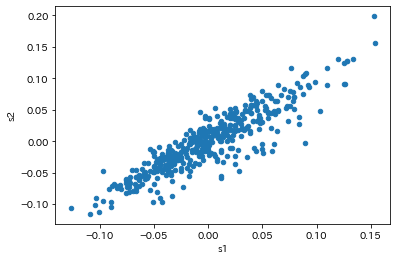

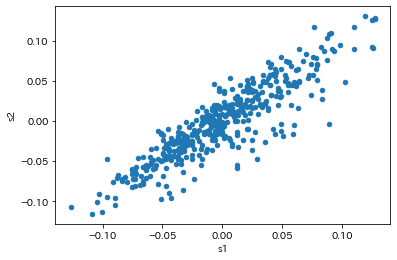

In [46]:
df.plot(kind = 'scatter' , x = 's1' , y = 's2')
df_Feature_drop.plot(kind = 'scatter' , x = 's1' , y = 's2')

# 各モデルでの正解率を出力する関数を作成
## ラッソ回帰 / リッジ回帰 パラメータにて調整
### パラメータ：alpha
### alphaを増やす → 正則化が強くなる → モデルは簡潔になる
### alphaを減らす → 正則化が弱くなる → モデルは複雑になる

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import linear_model

In [48]:
def GetScore(df_F, df_Ans, ran):
    # 訓練データ：8　テストデータ:2 の割合で分割
    x_train, x_val, y_train, y_val = train_test_split(df_F, df_Ans , test_size=0.2, random_state=ran)

    mdl = LinearRegression()  # 線形回帰 ・・・ 関係性を直線で表す回帰
    mdl.fit(x_train, y_train) # 学習
    print("正解率 = {} , random_state = {} , model = LinearRegression ".format(mdl.score(x_val , y_val),ran))  # 決定係数を求める

    mdl = Lasso(alpha=0.1)    # ラッソ回帰 ・・・ 最小二乗コスト関数に対して、重みの合計を足した回帰
    mdl.fit(x_train, y_train) # 学習
    print("正解率 = {} , random_state = {} , model = Lasso ".format(mdl.score(x_val , y_val),ran))  # 決定係数を求める

    mdl = Ridge(alpha=0.1)    # リッジ回帰 ・・・ 線形回帰に学習した重みを追加した回帰
    mdl.fit(x_train, y_train) # 学習
    print("正解率 = {} , random_state = {} , model = Ridge".format(mdl.score(x_val , y_val),ran))  # 決定係数を求める

# 現在の正解率を出力

In [49]:
GetScore(df_Feature_drop,df_Answer_drop,0)

正解率 = 0.4542227336275514 , random_state = 0 , model = LinearRegression 
正解率 = 0.4894776539505613 , random_state = 0 , model = Lasso 
正解率 = 0.46775238884095904 , random_state = 0 , model = Ridge


### 参考記事：https://3pysci.com/?s=%E7%B3%96%E5%B0%BF%E7%97%85%E6%82%A3%E8%80%85%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF

### 上記の記事と実際の内容を確認した所、多項式も交互作用でも大きく正解率が上がらないことを確認

In [50]:
# 特徴量データの見直し
# df_Feature2 = df_Feature.drop(["s3","s4","s6","age"], axis=1)
df_Feature_drop2 = df_Feature_drop

#  ●多項 
#df_Feature_drop2['s1 ** 2'] = df_Feature_drop2['s3'] ** 2

#  唯一上がったのは以下の点のみ
#  ●交互作用特徴量
df_Feature_drop2['s1 * s2'] = df_Feature_drop2['s1'] * df_Feature_drop2['s2']


In [51]:
GetScore(df_Feature_drop2,df_Answer_drop,0)

正解率 = 0.45581521556756843 , random_state = 0 , model = LinearRegression 
正解率 = 0.4894776539505613 , random_state = 0 , model = Lasso 
正解率 = 0.4678038365132532 , random_state = 0 , model = Ridge


### random_state = 285 , model = Ridge にすることで正解率を61%まで上昇

In [52]:
for i in range(285, 290  ,5):
    GetScore(df_Feature_drop2,df_Answer_drop,i)

正解率 = 0.6018897254155409 , random_state = 285 , model = LinearRegression 
正解率 = 0.6062787419948579 , random_state = 285 , model = Lasso 
正解率 = 0.6162485166338307 , random_state = 285 , model = Ridge


# 再調整 - 特徴量 見直し
## "age", "s4", "s5", "s6" を除外した形に学習

In [53]:
# 特徴量データ様にid , 進行状況をドロップ
# 画像データを特徴量データとして設定
df_Feature_p2 = df.drop([ "age", "id", "target" ,"age" ,"s4", "s5", "s6" ], axis=1)

# 先頭5行を表示
df_Feature_p2.head(5)

,sex,bmi,bp,s1,s2,s3
0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401
1,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412
2,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356
3,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038
4,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142


# 箱ひげ図の観点から外れ値がないかを確認

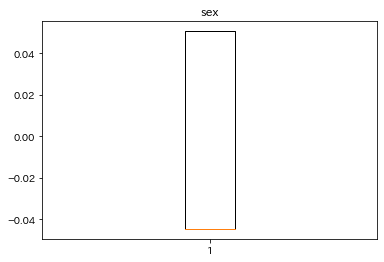

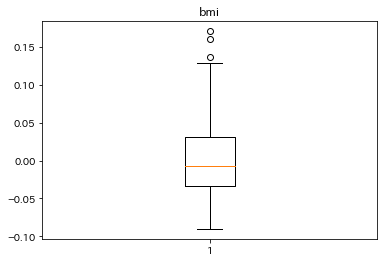

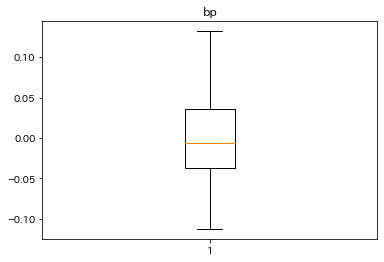

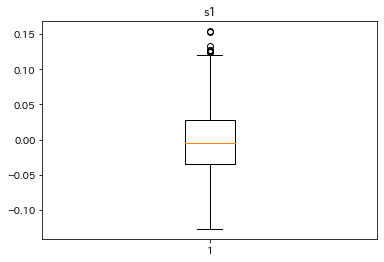

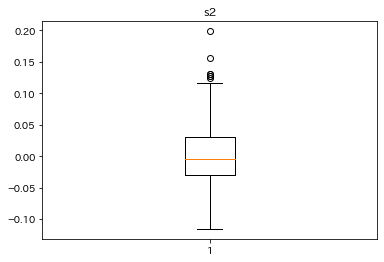

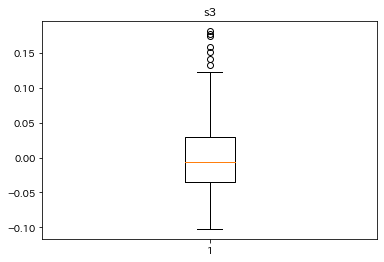

In [54]:
colname = df_Feature_p2.columns
for name in colname:
    if name != 'target':    # target は描画
        plt.title(name)
        plt.boxplot(df[name])
        plt.show()

# 上記の観点から以下の条件で外れ値を削除

In [55]:
# [補足] 上記で除外した外れ値も含まれている
print(df_Feature_p2[
        (df_Feature_p2['bmi'] > 0.1275) |
        (df_Feature_p2['s3'] > 0.10)    |
        (df_Feature_p2['s1'] > 0.10)    |
        (df_Feature_p2['s1'] < -0.10)   |
        (df_Feature_p2['s2'] < -0.10)   |
        (df_Feature_p2['s2'] > 0.10)].index)

Int64Index([  7,  10,  15,  33,  35,  43,  57,  58,  72,  76,  82, 123, 145,
            161, 164, 202, 214, 230, 248, 256, 260, 261, 266, 269, 276, 282,
            286, 287, 304, 346, 352, 354, 366, 367, 376, 379, 405, 414, 425,
            433, 441],
           dtype='int64')


In [56]:
# 外れ値を削除
li_index_drop = [
            7,  10,  15,  33,  35,  43,  57,  58,  72,  76,  82, 123, 145,
            161, 164, 202, 214, 230, 248, 256, 260, 261, 266, 269, 276, 282,
            286, 287, 304, 346, 352, 354, 366, 367, 376, 379, 405, 414, 425,
            433, 441]
df_Feature_drop = df_Feature_p2.drop(li_index_drop, axis = 0)
df_Answer_drop = df_Answer.drop(li_index_drop, axis = 0)

# 箱ひげ図で外れ値前後を確認

## 関数 : DisplayBoxBeard ・・・変更前後の箱ひげ図表示

In [57]:
def DisplayBoxBeard(df_before , df_after , name):
    # 変更前
    plt.title(name)
    plt.boxplot(df_before[name])
    plt.show()

    # 変更後
    plt.title(name)
    plt.boxplot(df_after[name])
    plt.show()


## bmi : 1つギリギリ外れ値が残るが、これを除外すると正解率が下がるためこのまま

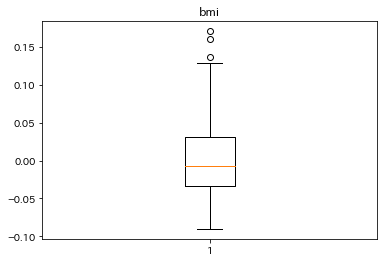

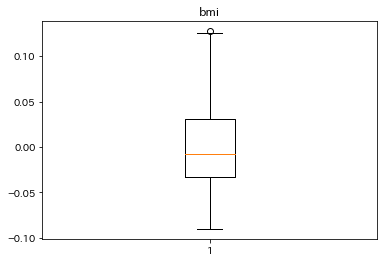

In [58]:
DisplayBoxBeard(df , df_Feature_drop , "bmi")

## s1 : 外れ値なし

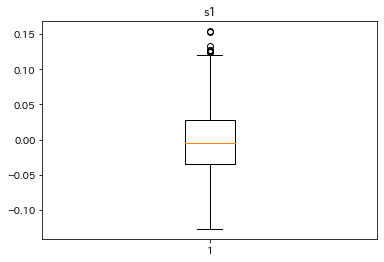

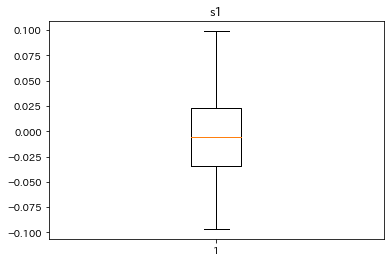

In [59]:
DisplayBoxBeard(df , df_Feature_drop , "s1")

## s2 : 外れ値なし

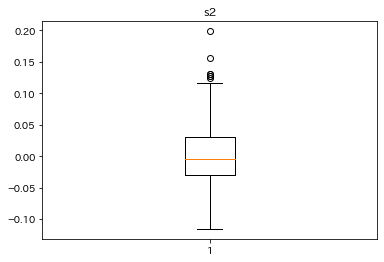

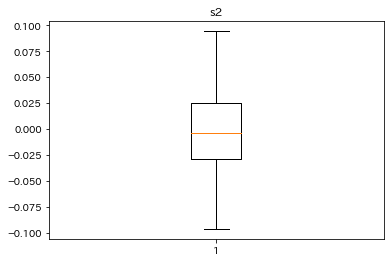

In [60]:
DisplayBoxBeard(df , df_Feature_drop , "s2")

## s3 : 外れ値なし

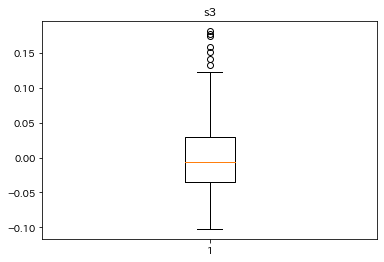

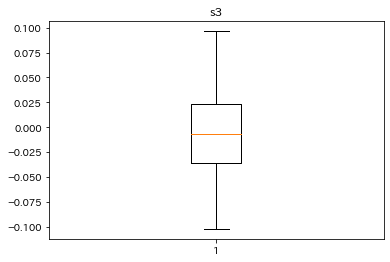

In [61]:
DisplayBoxBeard(df , df_Feature_drop , "s3")

# 再調整した正解率を出力

In [62]:
GetScore(df_Feature_drop,df_Answer_drop,0)

正解率 = 0.5571058986923192 , random_state = 0 , model = LinearRegression 
正解率 = 0.49741085969740684 , random_state = 0 , model = Lasso 
正解率 = 0.5243934678690849 , random_state = 0 , model = Ridge


# 上記にてチューニング処理を再度実施して正解率を出力

In [63]:
# 特徴量データの見直し
# df_Feature2 = df_Feature.drop(["s3","s4","s6","age"], axis=1)
df_Feature_drop2 = df_Feature_drop

#  ●交互作用特徴量
df_Feature_drop2['s1 * s2'] = df_Feature_drop2['s1'] * df_Feature_drop2['s2']

GetScore(df_Feature_drop,df_Answer_drop,0)

正解率 = 0.562612244964038 , random_state = 0 , model = LinearRegression 
正解率 = 0.49741085969740684 , random_state = 0 , model = Lasso 
正解率 = 0.5244287939870145 , random_state = 0 , model = Ridge


### random_state = 100 , model = LinearRegression にすることで正解率を64%まで上昇

In [34]:
for i in range(100, 105, 5):
    GetScore(df_Feature_drop2,df_Answer_drop,i)

正解率 = 0.6436371813815958 , random_state = 100 , model = LinearRegression 
正解率 = 0.5586935268088049 , random_state = 100 , model = Lasso 
正解率 = 0.5807507103744293 , random_state = 100 , model = Ridge


# 各値の標準前の範囲値が不明なため、予測する値をランダムで設定し、予測させる

In [64]:
x_train, x_val, y_train, y_val = train_test_split(df_Feature_drop2, df_Answer_drop , test_size=0.2, random_state=100)
mdl = LinearRegression ()
mdl.fit(x_train, y_train) # 学習
mdl.score(x_val , y_val)

0.6436371813815958

In [65]:
# 予測する値を設定（ -0.1 ~ 0.1 の範囲で 6列の予測値を作成 )
li_columns = ['sex','bmi','bp','s1','s2','s3']
random_pre_data=pd.DataFrame(np.random.uniform(-0.1,0.1,size=(1,6)),columns=li_columns)

# 上記のチューニングも含ませる
random_pre_data['s1 * s2'] = random_pre_data['s1'] * random_pre_data['s2']

# 表示
random_pre_data


,sex,bmi,bp,s1,s2,s3,s1 * s2
0,0.002565,0.024702,-0.088149,-0.040582,0.082885,-0.036766,-0.003364


In [66]:
# 予測
mdl.predict(random_pre_data)

array([58.23204822])

## 最後にモデルを保存
### モデル名 ：diabetes.pkl

In [67]:
# pickle インポート
import pickle

# モデル保存
with open('diabetes.pkl','wb') as f:
    pickle.dump(mdl,f)